# Project for the Course "Introduction to Data Sciene"
## by Johanna Einsiedler
August-September 2018, www.datasciencesociety.at

## The Data

### Data Source
The data used in this project comes from the 2014 Global Entrepreneurship Monitor and can be freely downloaded from [here](https://www.gemconsortium.org/data/sets?id=aps). All the analysis have been conducted with the "GEM 2014 APS Individual Level Data".

The Global Entrepreneurship Monitor is a yearly study with the aim of collecting data on entrepreneurial behaviour and attitudes of individuals as well as the national context and how it impacts entrepreneurship. The survey is administired to a minimum of 2,000 adults in each country. THE GEM is centrally coordinated but each participating country has a "National Team" which is led by an academic or research institution that is responsible for data collection (in Austria it is the "FH Joanneum").

As the data has been gathered through a survey, all of it may be subject to distortions created through deliberate or non-deliberate wrong answers. This should be kept in mind when interpreting the graphics etc.

### Data Structure

The original Data Set consists of 201,841 observations from 70 different countries of 278 variables. 
It is only available as a SAV-file. For our use it has been transformed to a CSV-File prior to importing it into R.


In [9]:
# librarys needed for the project
library(ggplot2)
library(ggrepel)
library(reshape2)
library(plyr)
library(rgdal)
library(dplyr)
library(grid)
library(rworldmap)
library("IRdisplay")

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'ggrepel' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"Warning message:
"package 'plyr' was built under R version 3.4.4"Warning message:
"package 'rgdal' was built under R version 3.4.4"Loading required package: sp
Warning message:
"package 'sp' was built under R version 3.4.4"rgdal: version: 1.3-4, (SVN revision 766)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.2.3, released 2017/11/20
 Path to GDAL shared files: C:/Users/hicom/Documents/R/win-library/3.4/rgdal/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 4.9.3, 15 August 2016, [PJ_VERSION: 493]
 Path to PROJ.4 shared files: C:/Users/hicom/Documents/R/win-library/3.4/rgdal/proj
 Linking to sp version: 1.3-1 
Warning message:
"package 'dplyr' was built under R version 3.4.4"
Attaching package: 'dplyr'

The f

In [1]:
# import data from GEM
df.gem <- read.csv("C:\\Users\\hicom\\Documents\\DataScienceCourse\\Project\\Data\\GEM.csv", sep = ";")

In [2]:
# show structure of the data
str(df.gem)

'data.frame':	201841 obs. of  278 variables:
 $ setid           : num  1.14e+09 1.14e+09 1.14e+09 1.14e+09 1.14e+09 ...
 $ country         : Factor w/ 70 levels "Angola","Argentina",..: 68 68 68 68 68 68 68 68 68 68 ...
 $ ctryalp         : Factor w/ 70 levels "AO","AR","AT",..: 66 66 66 66 66 66 66 66 66 66 ...
 $ CAT_GCR1        : Factor w/ 6 levels " ","Stage 1: factor driven",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ CAT_GCR2        : Factor w/ 4 levels " ","Stage 1: factor driven (includes transition countries to phase 2)",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ yrsurv          : int  2014 2014 2014 2014 2014 2014 2014 2014 2014 2014 ...
 $ ID              : int  1000115 1000121 1000319 1000460 1000461 1000498 1000559 1000589 1000699 1000705 ...
 $ weight          : Factor w/ 14472 levels " ","0,000112406",..: 5789 10523 9955 6663 5866 1736 7657 4309 5636 4594 ...
 $ WEIGHT_L        : Factor w/ 14157 levels " ","0,00010820337921300635",..: 5455 10127 1 6263 5517 1614 7197 4082 5324 4332 ...
 $ WEIGHT

## Analysis

### Preparations


For the following analysis the data set has been reduced to only 8 variables (metadata has been taken from the original SAV-file):
* **_setid_**: unique ID for each respondent 
* **_country_**: Name of the country
* **_UNEDUC_**: highest level of education attained according to [ISCED 1997](http://www.statistik.at/wcm/idc/idcplg?IdcService=GET_PDF_FILE&dDocName=104086) definitions
* **_gender_**: Options were "Refused", "Don't know", "Male" and "Female".
* **_bstart_**:  "Are you, alone or with others, currently trying to start a new business, including any self-employment or selling any goods or services to others? Options were "Don't know", "Refuse", "No" and "Yes".
* **_ownmge_**: "Are you alon or with others currently the owner of a business you help manage, self-employed or selling any goods or services to others?" Options were "Don't know", "Refuse", "No" and "Yes".
* **_ytransc_**: "Have you ever taken part in training on starting a business at primary or secondary school?" Options were "Don't know", "Refuse", "No" and "Yes".
* **_ytranlf_**: "Have you ever taken part in training on starting a business after you completed your education in school?" Options were "Don't know", "Refuse", "No" and "Yes".
* **_suskill_**: Do you have the knowledge, skill & experience required to start a business?" Options were "Don't know", "Refuse", "No" and "Yes".


In [3]:
# subset data to interesting variables
df.variables <- c('setid', 'country', 'UNEDUC', 'suskill', 'bstart', 'ownmge', 'gender',  'ytransc', 'ytranlf')
df.gem.2 <- df.gem[, df.variables]

### Distribution of Founders and Gender in the Sample

The aim ist to get an overview of the share of founders & business owners in the sample as well as the gender balance among them. In a first step a Contingency Table for the Variables **_bstart_** and **_ownmge_** is created - this should give a ruff overview of the total numbers and overlaps.

In [4]:
tab1 <- table (df.gem.2$bstart, df.gem.2$ownmge)
tab1

            
             Don't know     No Refused    Yes
  Don't know         72    447      42     87
  No                194 146318     229  24665
  Refused             5    247     348     22
  Yes               126  16146     100  12793

Then we condense **_bstart_** and **_ownmge_** into a single variable named **_business_** by encoding "Yes" as 1, "No" as 0 and "Don't know" & "Refused" as -1.

In [5]:
# add a column that contains 
# '1' if the person is either starting a business right now or is currently owning one
# '2' if the person is starting a business right now and is currently owning one
# '-1' if the person has answered at least one of these questions with "Don't know" or "Refused"

df.gem.2$business <- ifelse (df.gem.2$bstart == 'Yes', 1, 0)
df.gem.2$business <- ifelse(df.gem.2$ownmge == 'Yes', df.gem.2$business+1, df.gem.2$business )
df.gem.2$business <- ifelse(df.gem.2$ownmge == "Don't know" | df.gem.2$ownmge == "Refused" |df.gem.2$bstart == "Don't know" | df.gem.2$bstart == "Refused", -1, df.gem.2$business )

In the next step we create another new variable **_overview_** to show the number of male and female (non) founders & business owners respectively. 


In [6]:
# create a variable that contains
# '1' if the person is male and is neither a business owner nor currently trying to found
# '2' if the person is female and is neither a business owner nor currently trying to found
# '3' if the person is male and is a business owner, a current founder or both
# '4' if the person is femal and is a business owner, a current founder or both
# 'NA' if the person has answered one of the questions (bstart, ownmge, gender) with "Don't know" or "Refused"

df.gem.2$overview <-ifelse(df.gem.2$gender == "Female" & df.gem.2$business > 0, 3,
                           ifelse(df.gem.2$gender == "Male" & df.gem.2$business > 0, 4,
                           ifelse(df.gem.2$gender == "Female" & df.gem.2$business == 0, 2,
                           ifelse(df.gem.2$gender == "Male" & df.gem.2$business == 0, 1, "NA"))))

Create a contingency table for **_overview_** and **_country_** to see the distribution for each country. Delete the "NA" cases (1922 observations).

_Note: If the data was representative in the first step, this might not be the case anymore after this transformation unless we assume that there is no correlation between gender or business ownership with responding to either question with "Don't know" or "Refused"._

In [7]:
# calculate contingency table for female/male, founder/not founder & the countries (sort out NA - 3 cases)

tab2 <- table(df.gem.2$country, df.gem.2$overview)
tab2 <- prop.table(tab2[,-5], margin = 1)
tab2

                        
                                  1          2          3          4
  Angola                 0.24107143 0.25446429 0.25111607 0.25334821
  Argentina              0.31129808 0.41826923 0.11458333 0.15584936
  Australia              0.33317972 0.41981567 0.11474654 0.13225806
  Austria                0.35013562 0.41636528 0.09742315 0.13607595
  Barbados               0.34097859 0.36697248 0.14016310 0.15188583
  Belgium                0.41533066 0.43687375 0.05410822 0.09368737
  Belize                 0.37700146 0.43425522 0.08976225 0.09898108
  Bolivia                0.21723869 0.27067083 0.24375975 0.26833073
  Bosnia and Herzegovina 0.36051716 0.43411238 0.06961711 0.13575336
  Botswana               0.18744186 0.25534884 0.28744186 0.26976744
  Brazil                 0.28607164 0.32609566 0.19111467 0.19671803
  Burkina Faso           0.28707291 0.19513913 0.15709757 0.36069038
  Cameroon               0.15216334 0.21779290 0.29995139 0.33009237
  Canada 

Turn the table into a dataframe and rename variables & factors

In [11]:
# turn into dataframe and rename variables

df.gem.overview <- as.data.frame(tab2)
colnames(df.gem.overview) <- c('country', 'factors', 'percent')
df.gem.overview$factors <-revalue(df.gem.overview$factors, c('1' = 'Male Non-Founders', '2' = 'Female Non-Founders', '3' = 'Female Founders', '4' = 'Male Founders'))



Create a barplot that shows for each country the gender distribution among founders as well as non-founder in the sample.

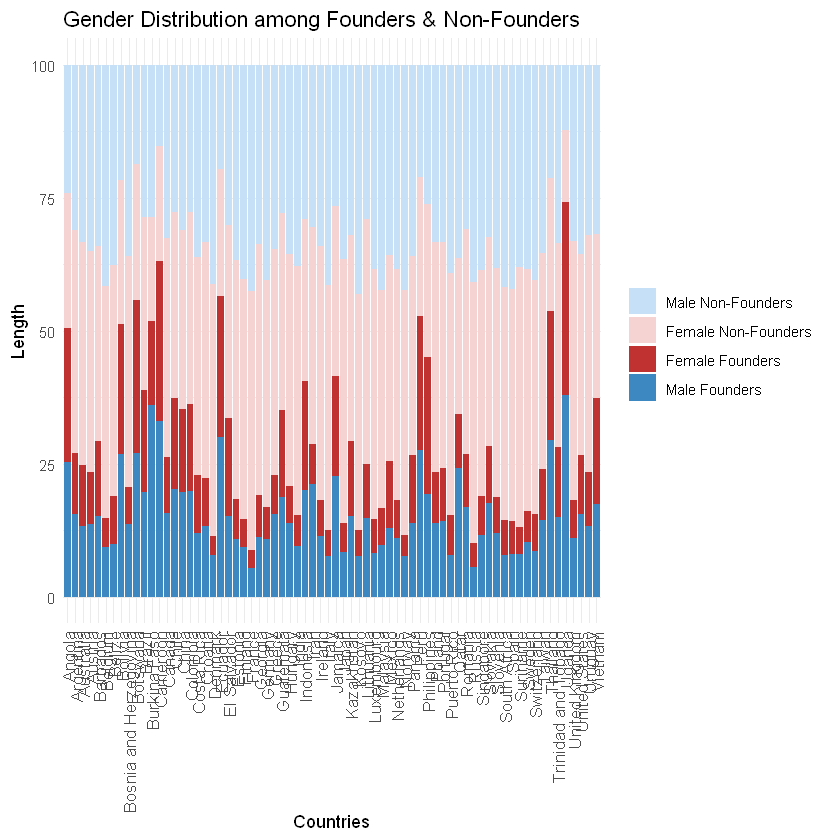

In [47]:
# create a barplot showing the distribution of gender among founders and the rest of the population

ggplot(data = df.gem.overview, aes(x=country, y=percent*100, fill=factors)) +
  geom_bar(stat="identity")+ 
  theme_minimal()+
  scale_fill_manual(values=c('#C6E1F7','#F5D3D3', '#C03131', '#3D88C1')) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 10))+
  labs(title="Gender Distribution among Founders & Non-Founders", 
         x="Countries", y = "Length", fill = '')

### Highest Education Level Attained and Self-Assessed Founding Skills

Here the aim is to take a look at the educational level of the survey participants as well as their self-assessement whether they possess the necessary knowledge, skilss and experience to start a business.

Therefore the data is subsetted, so that only founders are contained in the sample (53,604 observations).

In [18]:
# create a subset containing only (future) founders
df.gem.2.founders <- subset(x = df.gem.2, subset = business%in%c(1,2))

# number of business owners and current founders in the survey
num.bus <- nrow(df.gem.2.founders)
num.bus

[1] 53604

Next we create a contingency table showing the numbers for **_suskill_** and **_UNEDUC_** and save it as a data frame which is then subsetted to contain only respondents who answered "yes" or "no" to the skills-question.

_Note: Again this can lead to bias._

In [19]:
# create a data frame out of a contigency table of "suskill" and "UNEDUC"
df.gem.educ <- as.data.frame(table(df.gem.2.founders$suskill, df.gem.2.founders$UNEDUC)) 
colnames(df.gem.educ) <- c('suskill', 'UNEDUC', 'frequencies')

# only include people who answered "No" or "Yes"
df.gem.educ <- subset(x = df.gem.educ, subset = suskill%in%c('No', 'Yes') )

Then we calculate the percentages of the yes and no answers and save them as a string to use them as a label for the plot later on.

In [20]:
# calculate sum of people who answered "Yes" or "No" to the Question "Do you have the knowledge, skill & experience to start a business?" respectively
sum.yes <- sum(ifelse(df.gem.educ$suskill == "Yes", df.gem.educ$frequencies, 0))
sum.no <- sum(ifelse(df.gem.educ$suskill == "No", df.gem.educ$frequencies, 0))

# calculate percent values and save as string for labelling
df.gem.educ$percent <- ifelse(df.gem.educ$suskill == "Yes", df.gem.educ$frequencies/sum.yes, df.gem.educ$frequencies/sum.no)
df.gem.educ$percent1 <- paste(format(df.gem.educ$percent*100, digits = 2),"%", sep = "")

As the UNEDUC variable is not ordered according to the years of schooling necessary to attain the respective education level, we change the order and sort the data frame accordingly.

In [21]:

# define order for factors of UNEDUC & order data frame accordingly
df.gem.educ$UNEDUC <- ordered(df.gem.educ$UNEDUC, levels = c("Missing", "Pre-primary education", "Primary education or first stage of basic education", "Lower  secondary or second stage of basic education", 
                                                             "(Upper) secondary education", "Post-secondary non-tertiary education", "First stage of tertiary education", "Second stage of tertiary education"))

with(df.gem.educ, df.gem.educ[order(UNEDUC),])


# show structure of variables
str(df.gem.educ)

,suskill,UNEDUC,frequencies,percent,percent1
14,No,Missing,102,0.009303174,0.93%
16,Yes,Missing,360,0.008624614,0.86%
22,No,Pre-primary education,667,0.060835462,6.08%
24,Yes,Pre-primary education,2226,0.053328861,5.33%
26,No,Primary education or first stage of basic education,1634,0.149033200,14.90%
28,Yes,Primary education or first stage of basic education,4247,0.101746484,10.17%
10,No,Lower secondary or second stage of basic education,1963,0.179040496,17.90%
12,Yes,Lower secondary or second stage of basic education,6203,0.148606885,14.86%
2,No,(Upper) secondary education,3486,0.317949653,31.79%
4,Yes,(Upper) secondary education,13639,0.326753073,32.68%


'data.frame':	16 obs. of  5 variables:
 $ suskill    : Factor w/ 4 levels "Don't know","No",..: 2 4 2 4 2 4 2 4 2 4 ...
 $ UNEDUC     : Ord.factor w/ 8 levels "Missing"<"Pre-primary education"<..: 5 5 7 7 4 4 1 1 6 6 ...
 $ frequencies: int  3486 13639 1748 9412 1963 6203 102 360 1184 4932 ...
 $ percent    : num  0.318 0.327 0.159 0.225 0.179 ...
 $ percent1   : chr  "31.79%" "32.68%" "15.94%" "22.55%" ...


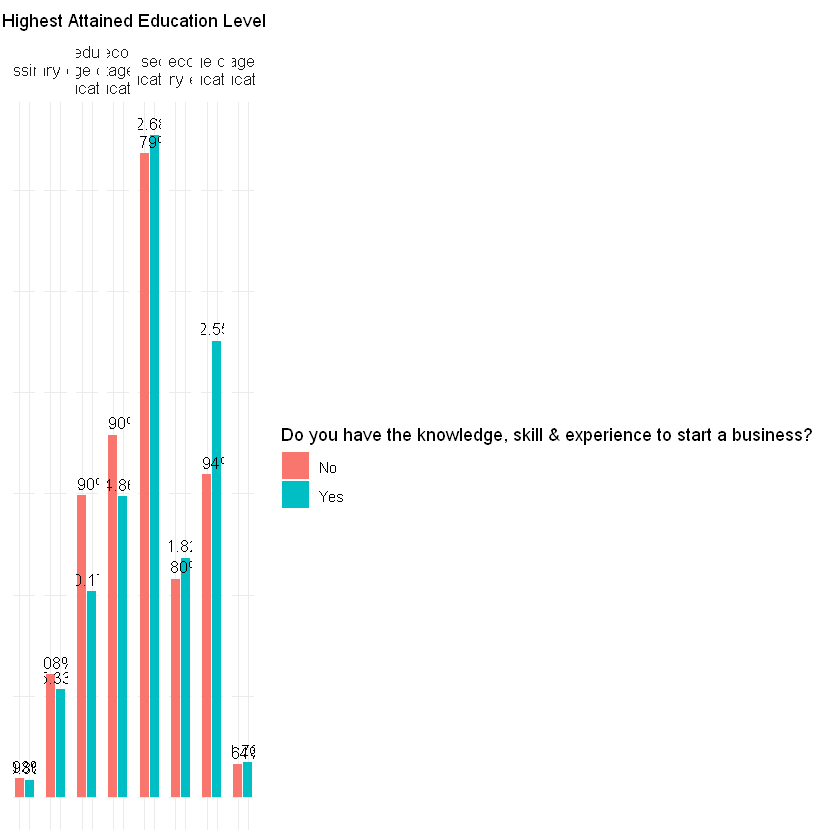

In [23]:
ggplot(data = df.gem.educ, aes(x = suskill, y = percent, group = UNEDUC))+
  geom_bar(stat = "identity", position = position_dodge(), aes(fill = suskill))+
  geom_text(aes(label = percent1), vjust = -0.5, position = position_dodge(0.9), size = 3.5)+
  theme_minimal()+
  facet_grid(~UNEDUC, labeller = label_wrap_gen())+
  labs(x = "Highest Attained Education Level", fill = "Do you have the knowledge, skill & experience to start a business?")+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.text.y = element_blank(),
        axis.title.y = element_blank(),
        strip.text.x = element_text(size = 10))+
        scale_x_discrete(position = "top")
library("IRdisplay")
display_png(file="plot.png) 

### Entrepreneurship Education in the EU

Next we look at entrepreneurship education in the EU - we compare the share of people having received training in starting a business over countries. The aim is to create an overview map that enables an easy comparison through colour coding.

Therfore we make use of the built in R- worldmap which we subset to EU-member states.


In [26]:
worldMap <- getMap()

# Member States of the European Union
europeanUnion <- c("Austria","Belgium","Bulgaria","Croatia","Cyprus",
                   "Czech Rep.","Denmark","Estonia","Finland","France",
                   "Germany","Greece","Hungary","Ireland","Italy","Latvia",
                   "Lithuania","Luxembourg","Malta","Netherlands","Poland",
                   "Portugal","Romania","Slovakia","Slovenia","Spain",
                   "Sweden","United Kingdom")

# Select only the index of states member of the E.U.
indEU <- which(worldMap$NAME%in%europeanUnion)

df.gem.EU <- filter(df.gem, country%in%europeanUnion)

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

Then we delete the entries which don't contain any information on either one of the analysed variables (**_ytransc_**, **_ytranlf_**).

_Note: It is not declared in the Metadata how this empty entries came to be. From these 156 observations, 3 are from the Netherlands and the remaining 153 from Belgium. Again, leaving this observations out can bring about a bias._

In [34]:

# delete empty entries

df.gem.EU.2 <- filter(df.gem.EU, ytransc != " " & ytranlf != " ")


Next the border coordinates of the EU states are extracted.

In [29]:
# Extract longitude and latitude border's coordinates of members states of E.U. 
europeCoords <- lapply(indEU, function(i){
  df <- data.frame(worldMap@polygons[[i]]@Polygons[[1]]@coords)
  df$region =as.character(worldMap$NAME[i])
  colnames(df) <- list("long", "lat", "region")
  return(df)
})

europeCoords <- do.call("rbind", europeCoords)


Then we create a contingency table looking at the numbers concerning entrepreneurship education in primary or secondary school (**_ytransc_**) and after schooling (**_ytranlf_**). This information is used to compile a new variable **_starteduc_** containing a 1 or 2 for people who 

In [35]:
  
# look how many people have taken part in training on starting a business in primary/secondary or grad school
tab3 <- table(df.gem.EU.2$ytransc, df.gem.EU.2$ytranlf)
tab3

# add a column that contains a 1 / 2 if the person has taken part in training on starting a business

df.gem.EU.2$starteduc <- ifelse (df.gem.EU.2$ytransc == 'Yes', 1, 0)
df.gem.EU.2$starteduc <- ifelse (df.gem.EU.2$ytranlf == 'Yes', df.gem.EU.2$starteduc+1, df.gem.EU.2$starteduc)

# get contingency table of country and starteduc

tab4 <- table(df.gem.EU.2$country, df.gem.EU.2$starteduc) 
tab4
df.starteduc <- as.data.frame.matrix(tab4)
colnames(df.starteduc) <- c("no.educ", "educ_onetype", "educ_twotype")

# add variables with row sums and percentage of people having attaneded entrepreneurial education
df.starteduc$sum <- rowSums(df.starteduc)
df.starteduc$percent <- (df.starteduc$educ_onetype + df.starteduc$educ_twotype)/df.starteduc$sum

# delete all non EU countries
df.starteduc <- df.starteduc[which(rownames(df.starteduc) %in% europeanUnion), ]

# add column with rownames
df.starteduc$country <- rownames(df.starteduc)


            
                   Don't Know    No Refused   Yes
                 0          0     0       0     0
  Don't Know     0         86   186       1    62
  No             0         74 54048      21 10841
  Refused        0          2     3      33     2
  Yes            0         27  4917       8  4672

We check if there are EU-countries which are not included in the GEM data set. This is the case - Bulgaria, Cyprus, Czech Republic, Latvia and Malta are not included. These countries will be marked grey in the map.

The share of people who received entrepreneurship education is added as an additional variable to the Polygon Data Frame.

In [36]:
# check whether there is data for all EU countries
setdiff(europeanUnion, rownames(df.starteduc))

# add values to map
europeCoords$value <- df.starteduc$percent[match(europeCoords$region, df.starteduc$country)]

[1] "Bulgaria"   "Cyprus"     "Czech Rep." "Latvia"     "Malta"

The map shows the percentage of people in the sample who have received training on starting a business for each country. Belgium has the highest rate (43.37%) while Greece has the lowest rate (12.7%).

_Note: Most of the code for this graphic has been taken from [here](http://egallic.fr/european-map-using-r/)._

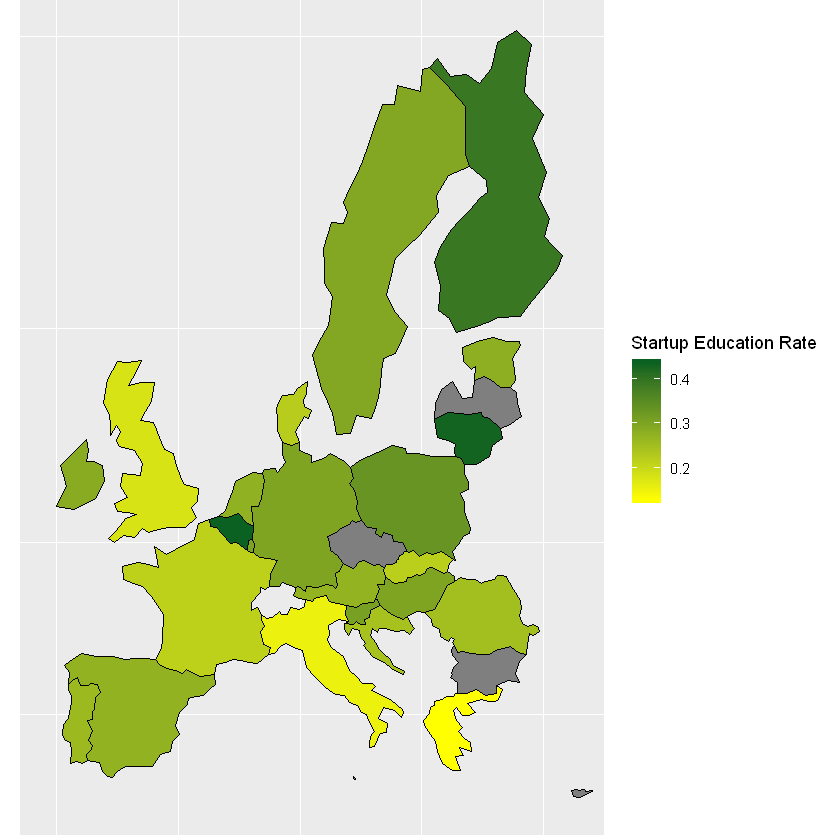

In [42]:
# Plot the map
P <- ggplot() + geom_polygon(data = europeCoords, aes(x = long, y = lat, group = region, fill = value),
                             colour = "black", size = 0.1) +
  coord_map(xlim = c(-13, 35),  ylim = c(32, 71))

P <- P + scale_fill_gradient(name = "Startup Education Rate", low = "#FFFF00", high = "#0B6121", na.value = "grey50")

P <- P + theme(
  axis.text.x = element_blank(),
  axis.text.y = element_blank(), axis.ticks.x = element_blank(),
  axis.ticks.y = element_blank(), axis.title = element_blank(),
  plot.margin = unit(0 * c(-1.5, -1.5, -1.5, -1.5), "lines"))
P
